# Import Data

In [5]:
import pandas as pd
import numpy as np
datafile = 'BlackFriday.csv'
df = pd.read_csv(datafile)

In [6]:
def clean(df):
    df=df.fillna(0)
    df['Gender']=np.where(df['Gender'] == 'F',0,1)
    df['Age'] = np.where(df['Age']=='0-17',0,np.where(df['Age']=='18-25',1,np.where(df['Age']=='26-35',2,np.where(df['Age']=='36-45',3,np.where(df['Age']=='46-50',4,np.where(df['Age']=='51-55',5,6))))))
    df['City_Category'] = np.where(df['City_Category']=='A',0,np.where(df['City_Category']=='B',1,2))
    df['Stay_In_Current_City_Years'] = np.where(df['Stay_In_Current_City_Years'] == '4+',4,np.where(df['Stay_In_Current_City_Years'] =='3',3,np.where(df['Stay_In_Current_City_Years'] =='2',2,np.where(df['Stay_In_Current_City_Years'] =='1',1,0))))
    return df


In [7]:
df = clean(df)
df = pd.get_dummies(df,columns=['Age','City_Category'])

In [8]:
y_df = df[['User_ID','Purchase']].groupby('User_ID').sum()
y_df=y_df.apply(lambda x: x/10000)
x_df = df.iloc[0:,[0,2,3,4,5,10,11,12,13,14,15,16,17,18,19]].groupby('User_ID').mean()
x_df.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,City_Category_0,City_Category_1,City_Category_2
User_ID,,,,,,,,,,,,,,
1000001,0,10,2,0,1,0,0,0,0,0,0,1,0,0
1000002,1,16,4,0,0,0,0,0,0,0,1,0,0,1
1000003,1,15,3,0,0,0,1,0,0,0,0,1,0,0
1000004,1,7,2,1,0,0,0,0,1,0,0,0,1,0
1000005,1,20,1,1,0,0,1,0,0,0,0,1,0,0


# Data Prepocessing
y is not follow the normal distribution 

we can not normalize y, instead,  we use the minmax method 

(array([4.405e+03, 9.590e+02, 3.220e+02, 1.340e+02, 4.900e+01, 1.300e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([   4.4108 ,  109.33755,  214.2643 ,  319.19105,  424.1178 ,
         529.04455,  633.9713 ,  738.89805,  843.8248 ,  948.75155,
        1053.6783 ]),
 <a list of 10 Patch objects>)

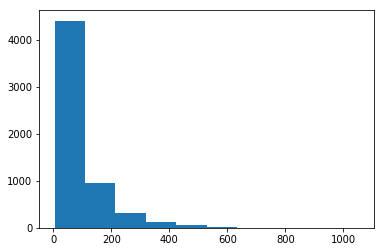

In [12]:
import matplotlib.pyplot as plt
import numpy as np  
plt.hist(np.array(y_df),10)

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_data = mm.fit_transform(y_df)
origin_data = mm.inverse_transform(mm_data)

In [14]:
y_df.mean()

Purchase    85.175155
dtype: float64

# Linear Regression

In [15]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(x_df, test_size = 0.3)
y_train,y_test = train_test_split(y_df, test_size = 0.3)
x_train
y_train


model = linear_model.LinearRegression()
model.fit(x_train,y_train)

testing_predictions  = model.predict(x_test)
print(model.coef_)
name = ['Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age_0','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6','City_Category_0','City_Category_1','City_Category_2']
di = pd.DataFrame(model.coef_,columns= name)
di.transpose()

[[ 2.41351778 -0.13698423  0.55103885  2.63371427  6.28232812 -1.97077606
   1.99052039  0.57163094 -6.89090201 -1.14435539  1.161554    1.49521678
  -1.16457258 -0.3306442 ]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


,0
Gender,2.413518
Occupation,-0.136984
Marital_Status,0.551039
Stay_In_Current_City_Years,2.633714
Age_0,6.282328
Age_1,-1.970776
Age_2,1.990520
Age_3,0.571631
Age_4,-6.890902
Age_5,-1.144355
